In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('food.csv')

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [5]:
# Select features and target
X = df.iloc[:, 4:]  # Features from the fifth column onward
y = df['Category']  # Target variable

In [12]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Exclude categorical columns
X = X.drop(columns=categorical_cols)

In [13]:
# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [14]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# Make predictions
y_pred = model.predict(X_test)

In [26]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)

Accuracy: 0.6668
Classification Report:
{'ACEROLA': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'ACORN FLOUR': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, 'ACORNS': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'AGAVE': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'AGUTUK': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'ALCOHOLIC BEV': {'precision': 0.8, 'recall': 0.9090909090909091, 'f1-score': 0.8510638297872342, 'support': 22}, 'ALLSPICE': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'ALMOND BUTTER': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, 'ALMONDS': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2}, 'ANCHOVY': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2}, 'APPLE CIDER-FLAVORED DRK': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, 'APPLE JUC': {'precision': 0.25, 'recall': 1.0, 'f1

c:\Users\pabma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pabma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pabma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pabma\anaconda3\Lib\site-packages\sklearn\metrics\_cla

In [29]:
df_report = pd.DataFrame(report).transpose()

df_report[df_report['f1-score']>0]

,precision,recall,f1-score,support
ALCOHOLIC BEV,0.800000,0.909091,0.851064,22.000000
ALMOND BUTTER,1.000000,1.000000,1.000000,1.000000
ALMONDS,1.000000,1.000000,1.000000,2.000000
APPLE JUC,0.250000,1.000000,0.400000,1.000000
APPLES,0.428571,1.000000,0.600000,3.000000
...,...,...,...,...
YARDLONG BEAN,1.000000,1.000000,1.000000,1.000000
YOGURT,0.800000,1.000000,0.888889,4.000000
accuracy,0.666817,0.666817,0.666817,0.666817
macro avg,0.293471,0.306239,0.286584,2224.000000


In [18]:
# Calculate feature importances
feature_importances = model.feature_importances_
feature_names = X.columns

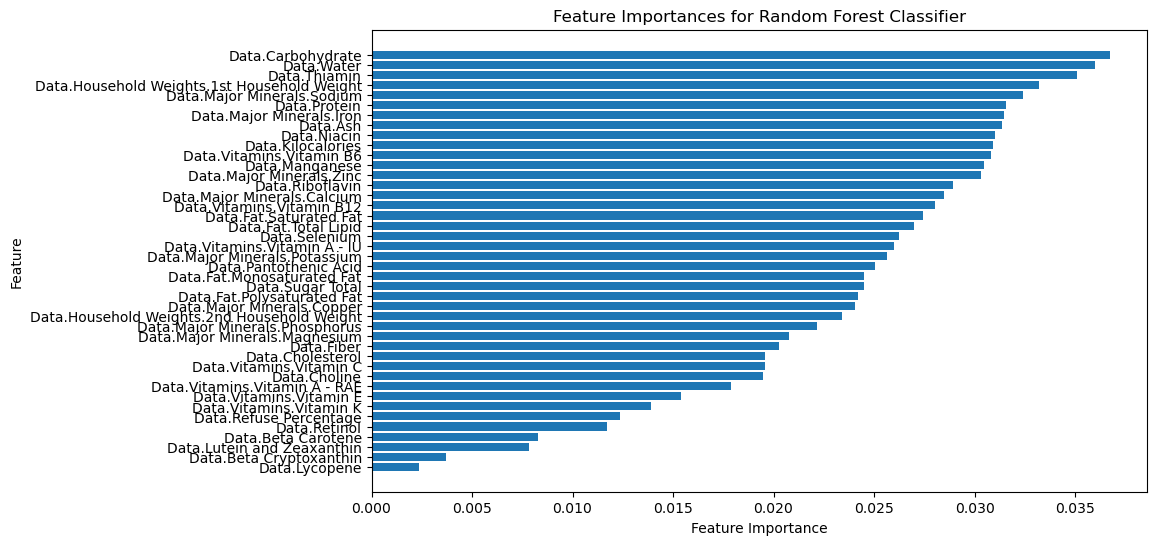

Top 10 most important features:
                                        Feature  Importance
3                             Data.Carbohydrate    0.036719
20                                   Data.Water    0.035969
19                                 Data.Thiamin    0.035119
25  Data.Household Weights.1st Household Weight    0.033203
33                   Data.Major Minerals.Sodium    0.032413
13                                 Data.Protein    0.031570
29                     Data.Major Minerals.Iron    0.031487
0                                      Data.Ash    0.031355
11                                  Data.Niacin    0.030993
7                             Data.Kilocalories    0.030919


In [20]:
import matplotlib.pyplot as plt

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Random Forest Classifier')
plt.gca().invert_yaxis()
plt.show()

# Print the top 10 most important features
print('Top 10 most important features:')
print(feature_importance_df.head(10))

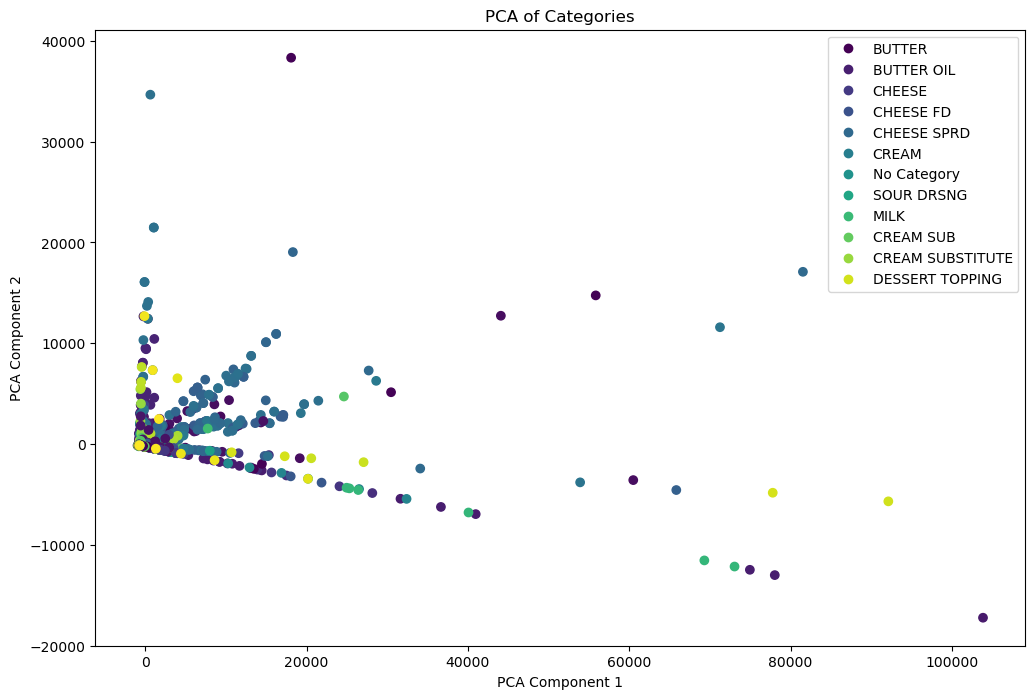

AttributeError: 'NoneType' object has no attribute 'split'

In [30]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y.factorize()[0], cmap='viridis')
plt.legend(handles=scatter.legend_elements()[0], labels=list(y.unique()))
plt.title('PCA of Categories')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y.factorize()[0], cmap='viridis')
plt.legend(handles=scatter.legend_elements()[0], labels=list(y.unique()))
plt.title('t-SNE of Categories')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()
